In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("Amazon Sales data.csv")

In [4]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [46]:
df.info

<bound method DataFrame.info of                                Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub-Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub-Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub-Saharan Africa             Mozambique        Household

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


Transform

Let's transform the data by converting the Order Date column to a datetime format and extracting the month, year, and quarter from it:


In [48]:
import datetime

df['Order Date']=pd.to_datetime(df['Order Date'])
df["Month"]=df['Order Date'].dt.month
df['Year']=df['Order Date'].dt.year
df['Quarter']=df['Order Date'].dt.quarter

In [49]:
df_transformed = df.copy()

Month-wise Sales Trend

In [50]:
month_wise_sales = df_transformed.groupby('Month')['Total Revenue'].sum()
print(month_wise_sales)

Month
1     10482467.12
2     24740517.77
3      2274823.87
4     16187186.33
5     13215739.99
6      5230325.77
7     15669518.50
8      1128164.91
9      5314762.56
10    15287576.61
11    20568222.76
12     7249462.12
Name: Total Revenue, dtype: float64


Revenue of every year's first month

In [51]:
yearly_first_month_sales = (df_transformed[(df_transformed['Month'] == 1)].groupby('Year')['Total Revenue'].sum()).sum()
print(yearly_first_month_sales)

10482467.12


Year-wise Sales Trend

In [52]:
year_wise_sales = df_transformed.groupby('Year')['Total Revenue'].sum()
print(year_wise_sales)

Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Revenue, dtype: float64


Yearly Month-wise Sales Trend

In [53]:
yearly_month_wise_sales = df_transformed.groupby(['Year', 'Month'])['Total Revenue'].sum()
print(yearly_month_wise_sales)

Year  Month
2010  2        3410661.12
      5        2587973.26
      6        1082418.40
      10       6064933.75
      11       3458252.00
      12       2581786.39
2011  1        1042225.35
      2         387002.20
      4        2798046.49
      5         272410.45
      6          19103.44
      7          97040.64
      9         574951.92
      11       5938385.58
2012  1        1012884.00
      2        6707849.42
      3         994765.42
      4        4556012.38
      5        3782781.82
      6        2132075.27
      7        4445093.92
      8         576782.80
      9        4648152.72
      10       3042246.77
2013  2        3296425.02
      3         835759.10
      4        3262562.10
      6        1352867.40
      7        8545511.20
      8          89623.98
      9          71253.21
      10       2702770.40
      12        173676.25
2014  2        1819660.25
      4        4510578.10
      5        3060338.59
      6          75591.66
      7         688641.85


Key Metrics and Factors

Let's calculate some key metrics and factors:

Average Order Value (AOV)

In [54]:
aov = df_transformed['Total Revenue'].sum() / df_transformed.shape[0]
print(f'Average Order Value: ${aov:.2f}')

Average Order Value: $1373487.68


Conversion Rate:

percentage of website visitors who make a purchase.

In [55]:
conversion_rate = (df_transformed['Units Sold'].sum() / df_transformed.shape[0]) * 100
print(f'Conversion Rate: {conversion_rate:.2f}%')
# print("Conversion rate :",round(conversion_rate,2),'%')

Conversion Rate: 512871.00%


Top-selling Products

In [56]:
top_selling_products = df_transformed.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False)
print(top_selling_products)

Item Type
Cosmetics          83718
Clothes            71260
Beverages          56708
Fruits             49998
Personal Care      48708
Office Supplies    46967
Household          44727
Baby Food          40545
Cereal             25877
Vegetables         20051
Snacks             13637
Meat               10675
Name: Units Sold, dtype: int64


In [57]:
correlation = df_transformed['Total Revenue'].corr(df_transformed['Units Sold'])
print(f'Correlation between Total Revenue and Units Sold: {correlation:.2f}')

Correlation between Total Revenue and Units Sold: 0.45


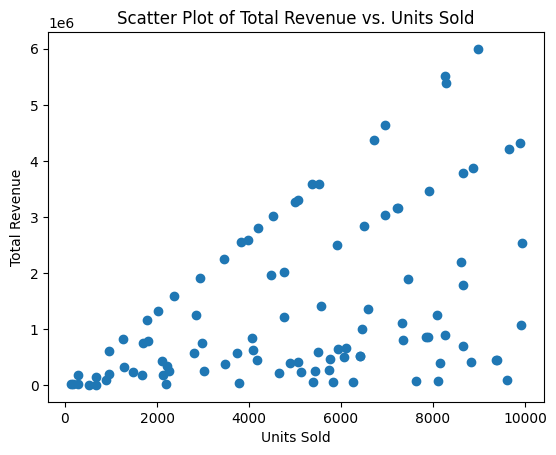

In [58]:


plt.scatter(df_transformed['Units Sold'], df_transformed['Total Revenue'])
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.title('Scatter Plot of Total Revenue vs. Units Sold')
plt.show()

In [59]:
# Aggregate data by month
m_wise_sales = df.groupby('Month').agg(
    Total_Units_Sold=('Units Sold', 'sum'),
    Total_Revenue=('Total Revenue', 'sum'),
    Total_Cost=('Total Cost', 'sum'),
    Total_Profit=('Total Profit', 'sum')
).reset_index()


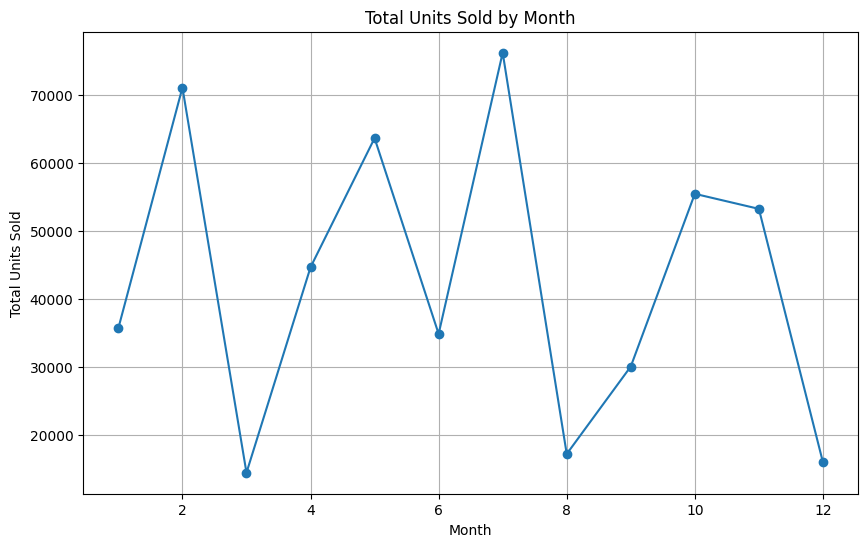

In [61]:


# Plot Total Units Sold by Month
plt.figure(figsize=(10, 6))
plt.plot(m_wise_sales['Month'], m_wise_sales['Total_Units_Sold'], marker='o')
plt.title('Total Units Sold by Month')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.grid(True)
plt.show()

# Similarly, create plots for Total Revenue, Total Cost, and Total Profit


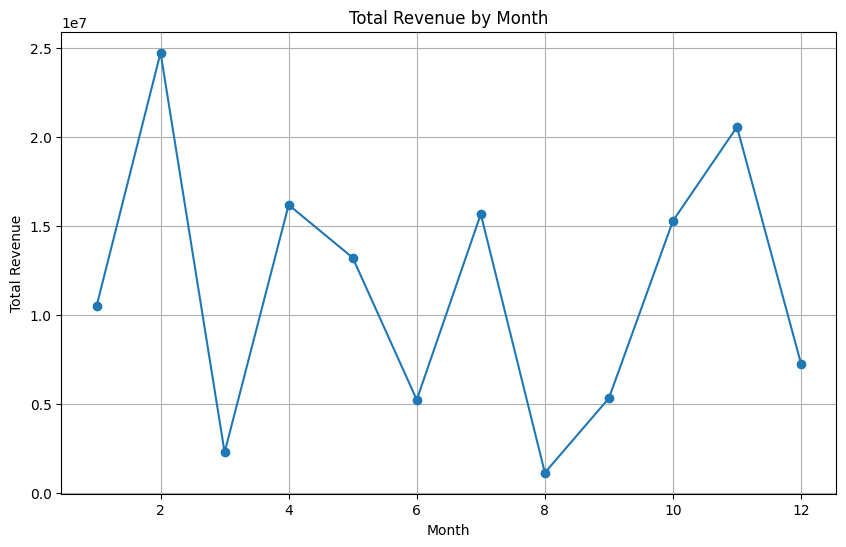

In [62]:

# Plot Total Units Sold by Month
plt.figure(figsize=(10, 6))
plt.plot(m_wise_sales['Month'], m_wise_sales['Total_Revenue'], marker='o')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# Similarly, create plots for Total Revenue, Total Cost, and Total Profit


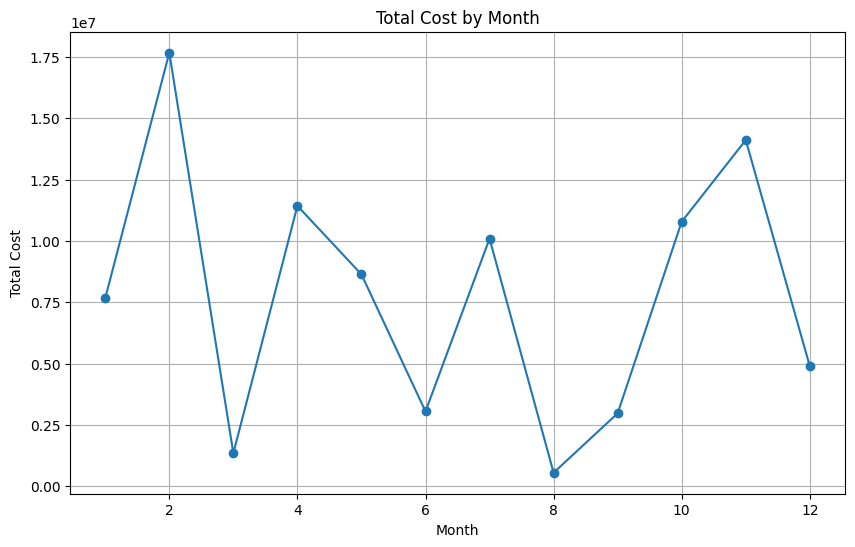

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(m_wise_sales['Month'], m_wise_sales['Total_Cost'], marker='o')
plt.title('Total Cost by Month')
plt.xlabel('Month')
plt.ylabel('Total Cost')
plt.grid(True)
plt.show()

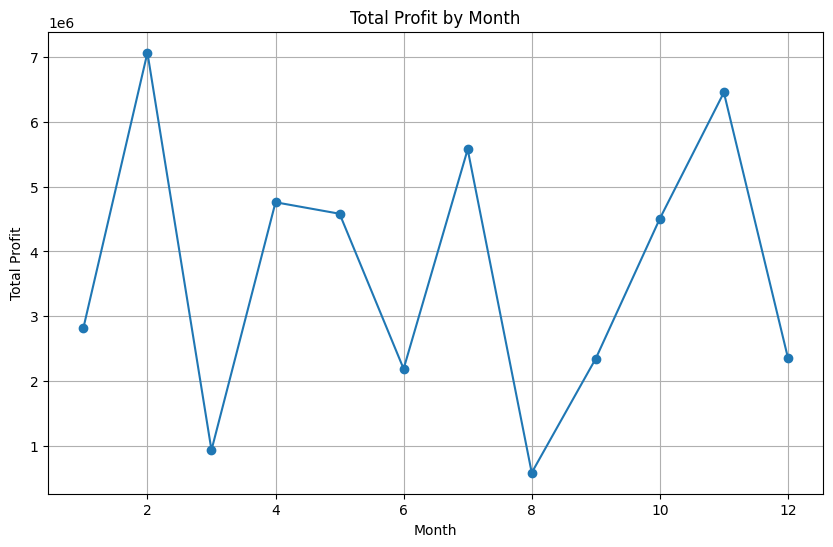

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(m_wise_sales['Month'], m_wise_sales['Total_Profit'], marker='o')
plt.title('Total Profit by Month')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

In [65]:
m_wise_sales['Month_Over_Month_Growth'] = m_wise_sales['Total_Revenue'].pct_change()

In [ ]:
month_wise_sales

,Month,Total_Units_Sold,Total_Revenue,Total_Cost,Total_Profit,Mnthe_Over_Month_Growth,Month_Over_Month_Growth
0,1,35742,10482467.12,7665610.10,2816857.02,NaN,NaN
1,2,71079,24740517.77,17668467.26,7072050.51,1.360181,1.360181
2,3,14497,2274823.87,1346472.81,928351.06,-0.908053,-0.908053
3,4,44680,16187186.33,11426977.98,4760208.35,6.115798,6.115798
4,5,63651,13215739.99,8633047.69,4582692.30,-0.183568,-0.183568
5,6,34893,5230325.77,3044946.34,2185379.43,-0.604235,-0.604235
6,7,76201,15669518.50,10091055.44,5578463.06,1.995897,1.995897
7,8,17251,1128164.91,548888.24,579276.67,-0.928003,-0.928003
8,9,30101,5314762.56,2970596.53,2344166.03,3.710980,3.710980
9,10,55472,15287576.61,10780653.36,4506923.25,1.876436,1.876436


Average Monthly Sales

In [67]:
avg_monthly_sales = m_wise_sales['Total_Revenue'].mean()

In [ ]:
avg_monthly_sales

11445730.6925

In [68]:
# Aggregate data by Year
y_wise_sales = df.groupby('Year').agg(
    Y_Total_Units_Sold=('Units Sold', 'sum'),
    Y_Total_Revenue=('Total Revenue', 'sum'),
    Y_Total_Cost=('Total Cost', 'sum'),
    Y_Total_Profit=('Total Profit', 'sum')
).reset_index()


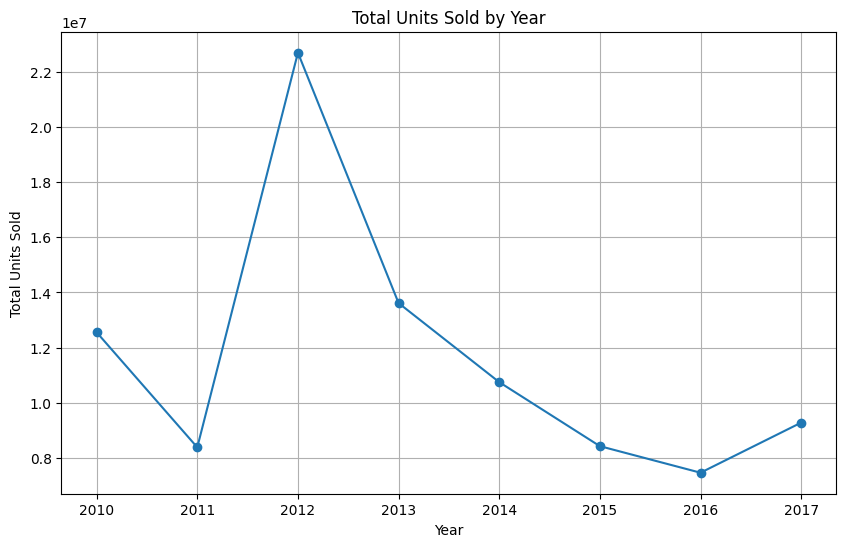

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(y_wise_sales['Year'], y_wise_sales['Y_Total_Cost'], marker='o')
plt.title('Total Units Sold by Year')
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.grid(True)
plt.show()

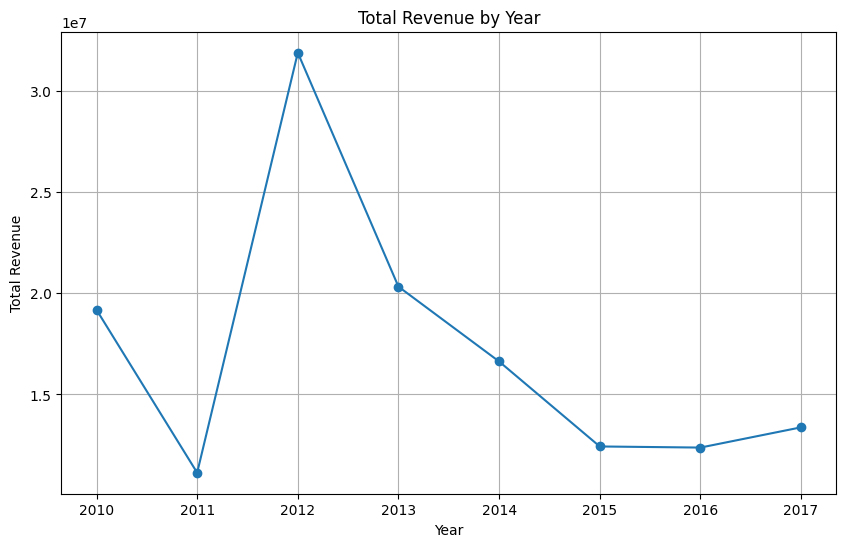

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(y_wise_sales['Year'], y_wise_sales['Y_Total_Revenue'], marker='o')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

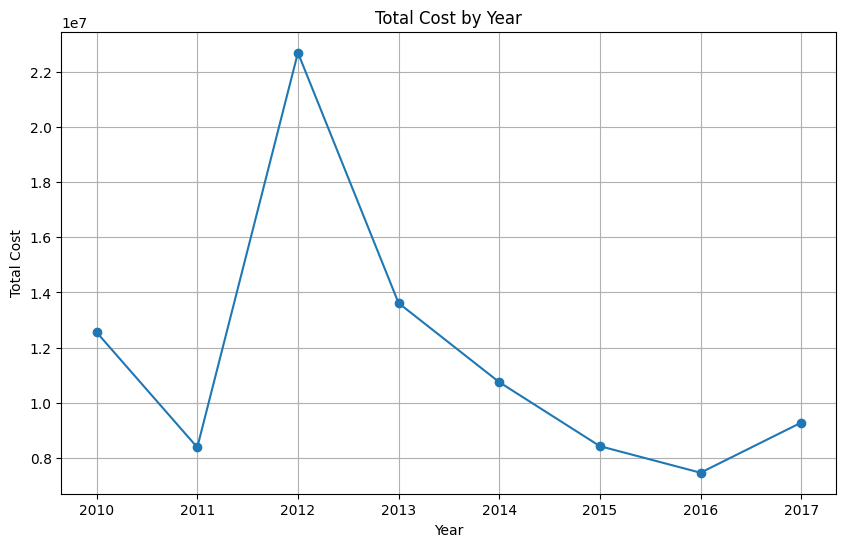

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(y_wise_sales['Year'], y_wise_sales['Y_Total_Cost'], marker='o')
plt.title('Total Cost by Year')
plt.xlabel('Year')
plt.ylabel('Total Cost')
plt.grid(True)
plt.show()

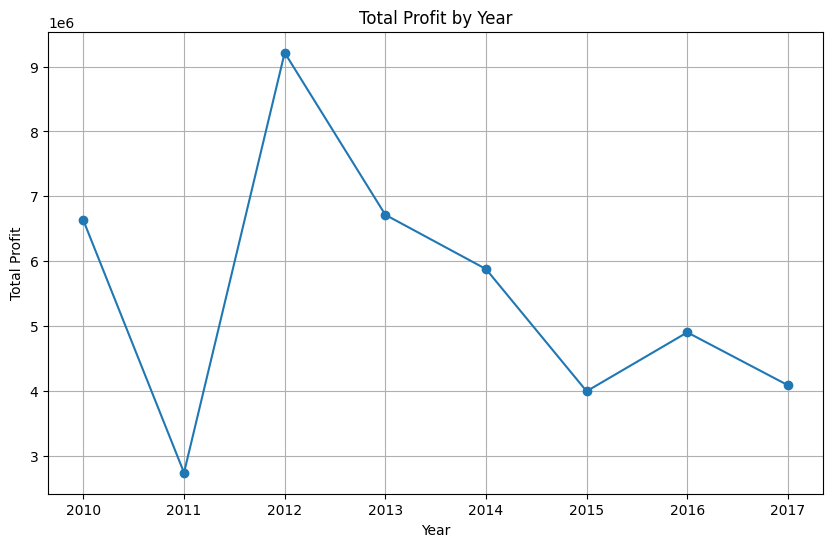

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(y_wise_sales['Year'], y_wise_sales['Y_Total_Profit'], marker='o')
plt.title('Total Profit by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()